# Disease Prediction
Predict disease based on tabular data

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp#visualization
import plotly.figure_factory as ff#visualization

# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 200)

# <a id='1'>1.Data</a>

In [2]:
df = pd.read_csv("data/rbuild.csv")
df_test = pd.read_csv("data/rtest.csv")
#first few rows
df.head()

,bcva01,age,va_pre,AMD,Corneal,EPI,BMI,glau_rx,retino,charlson,htn,cvd2,dur2,vegf,optime,sex,grpNotDM,grpDMnoDR,grpMild,grpModSevere,grpNOS,grpPDR,timing2m,timing1y,timing1eye,raceW,raceB,raceH,raceA,raceO,prophyNo,prophyPF,prophyNsaidP
0,1,69,50,0,0,0,29.0,0,0,1,1,0,0.07666,0,19,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1,73,60,0,0,0,30.0,0,0,2,1,0,0.00000,0,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,63,40,0,0,0,27.0,0,0,1,1,0,0.00000,0,15,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,77,30,0,0,0,22.3,0,0,0,0,0,0.00000,0,9,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,78,30,1,0,1,19.0,0,0,0,0,0,0.00000,0,13,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


## <a id='1.1'>1.1. Data overview</a>

In [5]:
# Training data
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
# print ("\nUnique values :  \n",df.nunique())

Rows     :  52203
Columns  :  33

Features : 
 ['bcva01', 'age', 'va_pre', 'AMD', 'Corneal', 'EPI', 'BMI', 'glau_rx', 'retino', 'charlson', 'htn', 'cvd2', 'dur2', 'vegf', 'optime', 'sex', 'grpNotDM', 'grpDMnoDR', 'grpMild', 'grpModSevere', 'grpNOS', 'grpPDR', 'timing2m', 'timing1y', 'timing1eye', 'raceW', 'raceB', 'raceH', 'raceA', 'raceO', 'prophyNo', 'prophyPF', 'prophyNsaidP']

Missing values :   0


In [6]:
# Test data
print ("Rows     : " ,df_test.shape[0])
print ("Columns  : " ,df_test.shape[1])
print ("\nFeatures : \n" ,df_test.columns.tolist())
print ("\nMissing values :  ", df_test.isnull().sum().values.sum())
# print ("\nUnique values :  \n",df_test.nunique())

Rows     :  13167
Columns  :  33

Features : 
 ['bcva01', 'age', 'va_pre', 'AMD', 'Corneal', 'EPI', 'BMI', 'glau_rx', 'retino', 'charlson', 'htn', 'cvd2', 'dur2', 'vegf', 'optime', 'sex', 'grpNotDM', 'grpDMnoDR', 'grpMild', 'grpModSevere', 'grpNOS', 'grpPDR', 'timing2m', 'timing1y', 'timing1eye', 'raceW', 'raceB', 'raceH', 'raceA', 'raceO', 'prophyNo', 'prophyPF', 'prophyNsaidP']

Missing values :   0


# <a id='2'>2. Data Manipulation</a>

In [9]:
#Data Manipulation
#change age values to categorical values
def age_grouping(df) :
    
    if df["age"] <= 30 :
        return "age_lt_30"
    elif (df["age"] > 30) & (df["age"] <= 40 ):
        return "age_30-40"
    elif (df["age"] > 40) & (df["age"] <= 50) :
        return "age_40-50"
    elif (df["age"] > 50) & (df["age"] <= 60) :
        return "age_50-60"
    elif (df["age"] > 60) & (df["age"] <= 70) :
        return "age_60-70"
    elif (df["age"] > 70) & (df["age"] <= 80) :
        return "age_70-80"
    elif df["age"] > 80 :
        return "age_gt_80"
df["age_group"] = df.apply(lambda df:age_grouping(df),
                                      axis = 1)
df_test["age_group"] = df_test.apply(lambda df_test:age_grouping(df_test),
                                      axis = 1)

In [ ]:
target_col = ["bcva01"]
cat_cols   = df.nunique()[df.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]

In [ ]:
df.head()

# <a id='3'>3. Exploratory Data Analysis</a>

## <a id='3.1'>3.1. Customer attrition in data</a>

In [5]:
#create pie chart of customer attrition
#labels
lab = df["bcva01"].value_counts().keys().tolist()
#values
val = df["bcva01"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# <a id='4'>4. Data preprocessing</a>

In [6]:
df.head()

,bcva01,age,va_pre,AMD,Corneal,EPI,BMI,glau_rx,retino,charlson,htn,cvd2,dur2,vegf,optime,sex,grpNotDM,grpDMnoDR,grpMild,grpModSevere,grpNOS,grpPDR,timing2m,timing1y,timing1eye,raceW,raceB,raceH,raceA,raceO,prophyNo,prophyPF,prophyNsaidP,age_group
0,1,69,50,0,0,0,29.0,0,0,1,1,0,0.07666,0,19,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,age_60-70
1,1,73,60,0,0,0,30.0,0,0,2,1,0,0.00000,0,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,age_70-80
2,0,63,40,0,0,0,27.0,0,0,1,1,0,0.00000,0,15,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,age_60-70
3,1,77,30,0,0,0,22.3,0,0,0,0,0,0.00000,0,9,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,age_70-80
4,0,78,30,1,0,1,19.0,0,0,0,0,0,0.00000,0,13,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,age_70-80


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["bcva01"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")


In [8]:
df.head()

,bcva01,AMD,Corneal,EPI,glau_rx,retino,htn,cvd2,vegf,sex,grpNotDM,grpDMnoDR,grpMild,grpModSevere,grpNOS,grpPDR,timing2m,timing1y,timing1eye,raceW,raceB,raceH,raceA,raceO,prophyNo,prophyPF,prophyNsaidP,age_group_age_30-40,age_group_age_40-50,age_group_age_50-60,age_group_age_60-70,age_group_age_70-80,age_group_age_gt_80,age_group_age_lt_30,age,va_pre,BMI,charlson,dur2,optime
0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,-0.447280,-0.473642,0.251441,0.070618,-0.484674,0.399401
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.007756,-0.355595,0.428260,0.827123,-0.498711,0.187985
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,-1.106565,-0.591689,-0.102196,0.070618,-0.498711,-0.023431
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.431767,-0.709736,-0.933242,-0.685888,-0.498711,-0.657677
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.541648,-0.709736,-1.516743,-0.685888,-0.498711,-0.234846


## <a id='3.7'>3.7. Variable Summary</a>

In [9]:
summary = (df_og[[i for i in df_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


## <a id='3.8'>3.8. Correlation Matrix</a>

In [10]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# <a id='5'>5. Model Building</a>
## <a id='5.1'>5.1. Baseline Model</a>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]


#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Negative","Positive"],
                        y = ["Negative","Positive"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = sp.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [22]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      6038
           1       0.66      0.67      0.67      7013

    accuracy                           0.64     13051
   macro avg       0.64      0.64      0.64     13051
weighted avg       0.64      0.64      0.64     13051

Accuracy   Score :  0.6404873189793886
Area under curve :  0.6378363737207488 



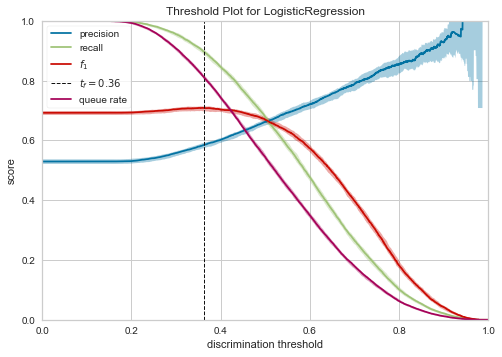

In [23]:
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


## <a id='5.2'>5.2. DNN</a>
* Lets try DNN
* two layers DNN

In [16]:
from keras import Sequential
from keras.layers import Dense

# train_X = train[cols]
# train_Y = train[target_col]
# test_X  = test[cols]
# test_Y  = test[target_col]

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=39))

#Second  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(train_X,train_Y, batch_size=10, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
39152/39152 [==============================] - 26s 661us/step - loss: 0.6361 - acc: 0.6376
Epoch 2/100
39152/39152 [==============================] - 22s 557us/step - loss: 0.6296 - acc: 0.6453
Epoch 3/100
39152/39152 [==============================] - 23s 597us/step - loss: 0.6269 - acc: 0.6482
Epoch 4/100
39152/39152 [==============================] - 25s 633us/step - loss: 0.6253 - acc: 0.6503
Epoch 5/100
39152/39152 [==============================] - 24s 607us/step - loss: 0.6239 - acc: 0.6512
Epoch 6/100
39152/39152 [==============================] - 22s 572us/step - loss: 0.6230 - acc: 0.6500
Epoch 7/100
39152/39152 [==============================] - 23s 588us/step - loss: 0.6224 - acc: 0.6526
Epoch 8/100
39152/39152 [==============================] - 24s 601us/step - loss: 0.6214 - acc: 0.6531
Epoch 9/100
39152/39152 [==============================] - 25s 632us/step - loss: 0.6210 - acc: 0.6556
Epoch 10/100
39152/39152 

39152/39152 [==============================] - 22s 563us/step - loss: 0.5941 - acc: 0.6755
Epoch 78/100
39152/39152 [==============================] - 21s 528us/step - loss: 0.5944 - acc: 0.6741
Epoch 79/100
39152/39152 [==============================] - 20s 519us/step - loss: 0.5938 - acc: 0.6761
Epoch 80/100
39152/39152 [==============================] - 20s 520us/step - loss: 0.5938 - acc: 0.6738
Epoch 81/100
39152/39152 [==============================] - 21s 530us/step - loss: 0.5937 - acc: 0.6749
Epoch 82/100
39152/39152 [==============================] - 21s 538us/step - loss: 0.5934 - acc: 0.6766
Epoch 83/100
39152/39152 [==============================] - 21s 537us/step - loss: 0.5932 - acc: 0.6726
Epoch 84/100
39152/39152 [==============================] - 21s 545us/step - loss: 0.5923 - acc: 0.6763
Epoch 85/100
39152/39152 [==============================] - 22s 553us/step - loss: 0.5931 - acc: 0.6756
Epoch 86/100
39152/39152 [==============================] - 20s 521us/step - 

In [18]:
eval_model=classifier.evaluate(train_X, train_Y)
eval_model

39152/39152 [==============================] - 3s 69us/step


[0.5854178315578893, 0.6824427870862281]

In [19]:
pred_Y=classifier.predict(test_X)
pred_Y =(pred_Y>0.5)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, pred_Y)
print(cm)

[[3791 2247]
 [2641 4372]]


## <a id='5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

In [ ]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in df.columns if i not in Id_col+target_col]

smote_X = df[cols]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


In [ ]:
# Accuracy   Score :  0.6436288407018619
# Area under curve :  0.6452494744653225 


## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
# from sklearn.feature_selection import RFE

# logit = LogisticRegression()

# rfe = RFE(logit,10)
# rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

# rfe.support_
# rfe.ranking_

# #identified columns Recursive Feature Elimination
# idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
#                        "columns" : [i for i in df.columns if i not in Id_col + target_col],
#                        "ranking" : rfe.ranking_,
#                       })
# cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


# #separating train and test data
# train_rf_X = os_smote_X[cols]
# train_rf_Y = os_smote_Y
# test_rf_X  = test[cols]
# test_rf_Y  = test[target_col]

# logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)
# #applying model
# telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
#                          cols,"coefficients",threshold_plot = True)

# tab_rk = ff.create_table(idc_rfe)
# py.iplot(tab_rk)

## <a id='5.4'>5.4. Univariate Selection</a>
* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared (chi^2) statistical test for non-negative features to select the best features

In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest

# #select columns
# cols = [i for i in df.columns if i not in Id_col + target_col ]

# #dataframe with non negative values
# df_x = df_og[cols]
# df_y = df_og[target_col]

# #fit model with k= 3
# select = SelectKBest(score_func = chi2,k = 3)
# fit    = select.fit(df_x,df_y)

# #Summerize scores
# print ("scores")
# print (fit.scores_)
# print ("P - Values")
# print (fit.pvalues_)

# #create dataframe
# score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
# score = score.sort_values(by = "scores" ,ascending =False)


# #createing new label for categorical and numerical columns
# score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

# #plot
# trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
#                     y = score[score["feature_type"] == "Categorical"]["scores"],
#                     name = "Categorial",mode = "lines+markers",
#                     marker = dict(color = "red",
#                                   line = dict(width =1))
#                    )

# trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
#                 y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
#                 marker = dict(color = "royalblue",
#                               line = dict(width =1)),
#                 xaxis = "x2",yaxis = "y2"
#                )
# layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
#                         plot_bgcolor  = "rgb(243,243,243)",
#                         paper_bgcolor = "rgb(243,243,243)",
#                         xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                      tickfont = dict(size =10),
#                                      domain=[0, 0.7],
#                                      tickangle = 90,zerolinewidth=1,
#                                      ticklen=5,gridwidth=2),
#                         yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
#                                      title = "scores",
#                                      zerolinewidth=1,ticklen=5,gridwidth=2),
#                         margin = dict(b=200),
#                         xaxis2=dict(domain=[0.8, 1],tickangle = 90,
#                                     gridcolor = 'rgb(255, 255, 255)'),
#                         yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
#                         )
#                   )

# data=[trace,trace1]
# fig = go.Figure(data=data,layout=layout)
# py.iplot(fig)

## <a id='5.5'>5.5. Decision Tree Visualization</a>
* Using top three numerical features

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from sklearn import tree
# from graphviz import Source
# from IPython.display import SVG,display

# #top 3 categorical features
# features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

# #top 3 numerical features
# features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


# #Function attributes
# #columns        - selected columns
# #maximum_depth  - depth of tree
# #criterion_type - ["gini" or "entropy"]
# #split_type     - ["best" or "random"]
# #Model Performance - True (gives model output)

# def plot_decision_tree(columns,maximum_depth,criterion_type,
#                        split_type,model_performance = None) :
    
#     #separating dependent and in dependent variables
#     dtc_x = df_x[columns]
#     dtc_y = df_y[target_col]
    
#     #model
#     dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
#                                            splitter  = split_type,
#                                            criterion = criterion_type,
#                                           )
#     dt_classifier.fit(dtc_x,dtc_y)
    
#     #plot decision tree
#     graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
#                                         rounded=True,proportion = False,
#                                         feature_names = columns, 
#                                         precision  = 2,
#                                         class_names=["Not churn","Churn"],
#                                         filled = True                         
#                                        )
#                   )
    
#     #model performance
#     if model_performance == True :
#         telecom_churn_prediction(dt_classifier,
#                                  dtc_x,test_X[columns],
#                                  dtc_y,test_Y,
#                                  columns,"features",threshold_plot = True)
#     display(graph)
    
# plot_decision_tree(features_num,3,"gini","best")

### * Using top three categorical features

In [ ]:
# plot_decision_tree(features_cat,3,"entropy","best",
#                    model_performance = True ,)

In [ ]:
df.head()

In [ ]:
# #using contract,tenure and paperless billing variables
# columns = ['age_group_age_gt_80','age_group_age_70-80', 'Corneal',
#            'retino', 'glau_rx']

# plot_decision_tree(columns,3,"gini","best",model_performance= True)

## <a id='5.6'>5.6. KNN Classifier</a>
* Applying knn algorithm to smote  oversampled data.


In [ ]:
# def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
#                                  training_y,testing_y,threshold_plot = True) :
    
#     #model
#     algorithm.fit(training_x,training_y)
#     predictions   = algorithm.predict(testing_x)
#     probabilities = algorithm.predict_proba(testing_x)
    
#     print (algorithm)
#     print ("\n Classification report : \n",classification_report(testing_y,predictions))
#     print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
#     #confusion matrix
#     conf_matrix = confusion_matrix(testing_y,predictions)
#     #roc_auc_score
#     model_roc_auc = roc_auc_score(testing_y,predictions) 
#     print ("Area under curve : ",model_roc_auc)
#     fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
#     #plot roc curve
#     trace1 = go.Scatter(x = fpr,y = tpr,
#                         name = "Roc : " + str(model_roc_auc),
#                         line = dict(color = ('rgb(22, 96, 167)'),width = 2),
#                        )
#     trace2 = go.Scatter(x = [0,1],y=[0,1],
#                         line = dict(color = ('rgb(205, 12, 24)'),width = 2,
#                         dash = 'dot'))
    
#     #plot confusion matrix
#     trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
#                         y = ["Not churn","Churn"],
#                         showscale  = False,colorscale = "Blues",name = "matrix",
#                         xaxis = "x2",yaxis = "y2"
#                        )
    
#     layout = go.Layout(dict(title="Model performance" ,
#                             autosize = False,height = 500,width = 800,
#                             showlegend = False,
#                             plot_bgcolor  = "rgb(243,243,243)",
#                             paper_bgcolor = "rgb(243,243,243)",
#                             xaxis = dict(title = "false positive rate",
#                                          gridcolor = 'rgb(255, 255, 255)',
#                                          domain=[0, 0.6],
#                                          ticklen=5,gridwidth=2),
#                             yaxis = dict(title = "true positive rate",
#                                          gridcolor = 'rgb(255, 255, 255)',
#                                          zerolinewidth=1,
#                                          ticklen=5,gridwidth=2),
#                             margin = dict(b=200),
#                             xaxis2=dict(domain=[0.7, 1],tickangle = 90,
#                                         gridcolor = 'rgb(255, 255, 255)'),
#                             yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
#                            )
#                   )
#     data = [trace1,trace2,trace3]
#     fig = go.Figure(data=data,layout=layout)
    
#     py.iplot(fig)
    
#     if threshold_plot == True : 
#         visualizer = DiscriminationThreshold(algorithm)
#         visualizer.fit(training_x,training_y)
#         visualizer.poof()

    
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
#            weights='uniform')
# telecom_churn_prediction_alg(knn,os_smote_X,test_X,
#                              os_smote_Y,test_Y,threshold_plot = True)

## <a id='5.7'>5.7. Vizualising a decision tree from random forest classifier</a>

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# #function attributes
# #columns  - column used
# #nf_estimators   - The number of trees in the forest.
# #estimated_tree  - tree number to be displayed
# #maximum_depth   - depth of the tree
# #criterion_type  - split criterion type ["gini" or "entropy"]
# #Model performance - prints performance of model

# def plot_tree_randomforest(columns,nf_estimators,
#                            estimated_tree,maximum_depth,
#                            criterion_type,model_performance = None) :
    
#     dataframe = df_og[columns + target_col].copy()
    
#     #train and test datasets
#     rf_x     = dataframe[[i for i in columns if i not in target_col]]
#     rf_y     = dataframe[target_col]
    
#     #random forest classifier
#     rfc   = RandomForestClassifier(n_estimators = nf_estimators,
#                                    max_depth = maximum_depth,
#                                    criterion = criterion_type,
#                                   )
#     rfc.fit(rf_x,rf_y)
    
#     estimated_tree = rfc.estimators_[estimated_tree]
    
#     graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
#                                         rounded=True,proportion = False,
#                             feature_names = columns, 
#                             precision  = 2,
#                             class_names=["Not churn","Churn"],
#                             filled = True))
#     display(graph)
    
#     #model performance
#     if model_performance == True :
#         telecom_churn_prediction(rfc,
#                                  rf_x,test_X[columns],
#                                  rf_y,test_Y,
#                                  columns,"features",threshold_plot = True)
        

In [ ]:
# cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
# plot_tree_randomforest(cols1,100,99,3,"entropy",True)

## <a id='5.8'>5.8. A random forest classifier.</a>
* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three  for each tree. Each tree produced is slightly different from other.

In [ ]:
# #making 10 trees with random forest.
# n = np.arange(0,10).tolist()
# cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
# for i in n :
#     plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

In [ ]:
# #making 10 trees with random forest for columns 
# #selected from recursive feature elimination

# n = np.arange(0,10).tolist()
# cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
# for i in n :
#     plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)


## <a id='5.9'>5.9. Gaussian Naive Bayes.</a>

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB(priors=None)

# telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

## <a id='5.10'>5.10. Support Vector Machine</a>
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes 

In [ ]:
# from sklearn.svm import SVC

# #Support vector classifier
# #using linear hyper plane
# svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#                decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
#                max_iter=-1, probability=True, random_state=None, shrinking=True,
#                tol=0.001, verbose=False)

# cols = [i for i in df.columns if i not in Id_col + target_col]
# telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
#                          cols,"coefficients",threshold_plot = False)

## <a id='5.11'>5.11. Tuning parameters for support vector machine</a>

In [ ]:
# #tuning parameters
# #Support vector classifier
# #using non-linear hyper plane("rbf")
# from sklearn.svm import SVC

# svc_rbf  = SVC(C=1.0, kernel='rbf', 
#                degree= 3, gamma=1.0, 
#                coef0=0.0, shrinking=True,
#                probability=True,tol=0.001,
#                cache_size=200, class_weight=None,
#                verbose=False,max_iter= -1,
#                random_state=None)

# telecom_churn_prediction_alg(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,threshold_plot = False)

## <a id='5.12'>5.12. LightGBMClassifier</a>

In [ ]:
# from lightgbm import LGBMClassifier

# lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                         learning_rate=0.5, max_depth=7, min_child_samples=20,
#                         min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
#                         n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
#                         reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
#                         subsample_for_bin=200000, subsample_freq=0)

# cols = [i for i in df.columns if i not in Id_col + target_col]
# telecom_churn_prediction(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
#                          cols,"features",threshold_plot = True)


In [ ]:
# Accuracy   Score :  0.62
# Area under curve :  0.62

## <a id='5.13'>5.13. XGBoost  Classifier</a>

In [ ]:
# from xgboost import XGBClassifier

# xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                     colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
#                     max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
#                     n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#                     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#                     silent=True, subsample=1)


# telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
#                          cols,"features",threshold_plot = True)

In [ ]:
# Accuracy   Score :  0.6020228334993487
# Area under curve :  0.6009980423901158 

# <a id='6'>6. Model Performances</a>
## <a id='6.1'>6.1. model performance metrics</a>

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

## <a id='6.2'>6.2. Compare model metrics</a>

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)



## <a id='6.3'>6.3. Confusion matrices for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='6.4'>6.4. ROC - Curves  for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## <a id='6.5'>6.5. Precision recall curves</a>

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))
    